In [6]:
import pandas as pd
import numpy as np

def get_statistics_data(data_type):
    path = f'{data_type}_Summary.xlsx'
    data = pd.read_excel(path)
    data.describe().to_csv(f'data/new_data/{data_type}_statistic.csv', encoding='utf-8-sig')
    print(data['Fasting Plasma Glucose (mg/dl)'][data['Fasting Plasma Glucose (mg/dl)'] != '/'].describe())
    print(data['2-hour Postprandial Plasma Glucose (mg/dl)'][data['2-hour Postprandial Plasma Glucose (mg/dl)'] != '/'].describe())
    print(data['HbA1c (mmol/mol)'][data['HbA1c (mmol/mol)'] != '/'].describe())

get_statistics_data('Shanghai_T1DM')
get_statistics_data('Shanghai_T2DM')

count     16.000000
mean     193.230000
std       86.486582
min       80.280000
25%      117.000000
50%      181.800000
75%      252.225000
max      352.800000
Name: Fasting Plasma Glucose (mg/dl), dtype: float64
count      14.00
unique     13.00
top       258.84
freq        2.00
Name: 2-hour Postprandial Plasma Glucose (mg/dl), dtype: float64
count     15.000
unique    12.000
top       69.405
freq       2.000
Name: HbA1c (mmol/mol), dtype: float64
count     106.0
unique     74.0
top       167.4
freq        7.0
Name: Fasting Plasma Glucose (mg/dl), dtype: float64
count      87.0
unique     84.0
top       315.9
freq        2.0
Name: 2-hour Postprandial Plasma Glucose (mg/dl), dtype: float64
count     101.000
unique     57.000
top        59.568
freq        6.000
Name: HbA1c (mmol/mol), dtype: float64


In [8]:
data_type='Shanghai_T2DM'
path=f'{data_type}_Summary.xlsx'
data=pd.read_excel(path)
data.describe().to_csv(f'data/new_data/{data_type}_statistic.csv',encoding='utf-8-sig')
print(pd.to_numeric(data['Fasting Plasma Glucose (mg/dl)'][data['Fasting Plasma Glucose (mg/dl)']!='/']).describe())
print(pd.to_numeric(data['2-hour Postprandial Plasma Glucose (mg/dl)'][data['2-hour Postprandial Plasma Glucose (mg/dl)']!='/']).describe())
print(pd.to_numeric(data['HbA1c (mmol/mol)'][data['HbA1c (mmol/mol)']!='/']).describe())

count    106.000000
mean     164.871509
std       62.750678
min       55.800000
25%      126.000000
50%      158.400000
75%      186.300000
max      432.000000
Name: Fasting Plasma Glucose (mg/dl), dtype: float64
count     87.000000
mean     264.757241
std       96.037434
min       97.020000
25%      195.390000
50%      250.200000
75%      315.900000
max      610.380000
Name: 2-hour Postprandial Plasma Glucose (mg/dl), dtype: float64
count    101.000000
mean      74.653564
std       26.565081
min       23.499000
25%       53.010000
50%       67.219000
75%       94.544000
max      144.822000
Name: HbA1c (mmol/mol), dtype: float64


[7, 10, 10, 4, 14, 10, 14, 13, 14, 12, 14, 8, 8, 10, 6, 14]
168


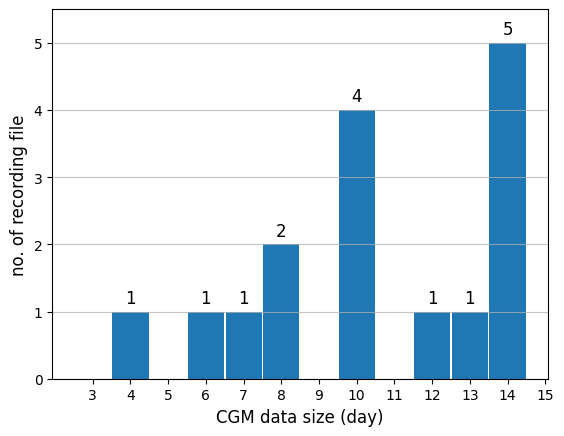

No CGM column found in 2045_0_20201216.xls, skipping...
No CGM column found in 2095_0_20201116.xls, skipping...
[14, 13, 14, 6, 7, 6, 8, 5, 9, 6, 6, 6, 5, 3, 4, 14, 14, 14, 14, 14, 14, 14, 13, 8, 6, 12, 10, 6, 8, 8, 12, 12, 9, 9, 10, 10, 3, 8, 5, 3, 6, 14, 6, 7, 11, 5, 5, 9, 7, 12, 13, 13, 12, 14, 13, 14, 13, 6, 11, 14, 6, 13, 14, 14, 14, 10, 13, 13, 13, 9, 13, 13, 14, 13, 13, 13, 13, 14, 13, 14, 12, 11, 10, 13, 11, 14, 14, 14, 14, 13, 11, 14, 7, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
1173


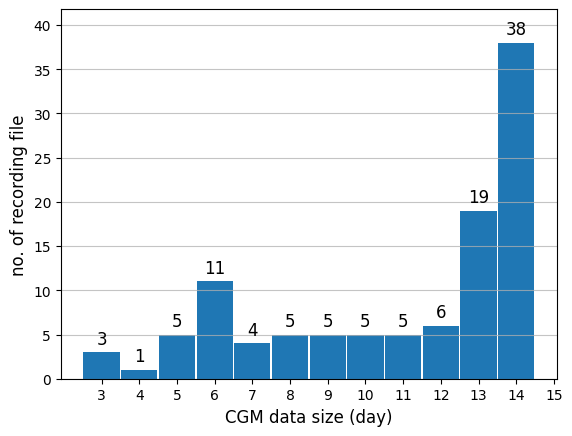

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math
from matplotlib.ticker import MaxNLocator

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

def get_cgm_fig(diabetes_type):
    data_path=f'data/new_data/{diabetes_type}'
    patient_len_list=[]
    for file in os.listdir(data_path):
        data=pd.read_excel(f'{data_path}/{file}')
        # Fix: find column that contains 'CGM' and 'mg'
        cgm_col = [col for col in data.columns if 'CGM' in col and 'mg' in col]
        if not cgm_col:
            print(f"No CGM column found in {file}, skipping...")
            continue
        col_name = cgm_col[0]
        patient_len_list.append(math.ceil(len(data[col_name].dropna())/96))
    print(patient_len_list)
    print(sum(patient_len_list))
    n, bins, patches=plt.hist(patient_len_list,bins=np.arange(3,16),rwidth=0.96,align='left')
    for i in range(len(n)):
        if n[i]!=0:
            plt.text(bins[i], n[i]+max(n)/40, int(n[i]), fontsize=12, horizontalalignment="center")

    plt.grid(axis= 'y', alpha= 0.75)
    plt.ylabel('no. of recording file',fontsize = 12)
    plt.ylim(0,max(n)+max(n)/10)

    plt.xlabel('CGM data size (day)',fontsize = 12)
    plt.xticks(range(3,16),range(3,16))
    plt.savefig(f'frequency_{diabetes_type}.jpg',dpi=200,bbox_inches='tight')
    plt.show()
    
get_cgm_fig('Shanghai_T1DM')
get_cgm_fig('Shanghai_T2DM')

--- Shanghai_T1DM ---
TAR: 37.763855988896154 18.833395777513637
TIR: 54.73290374672831 14.540733403335738
TBR: 7.50324026437554 7.003103224737889


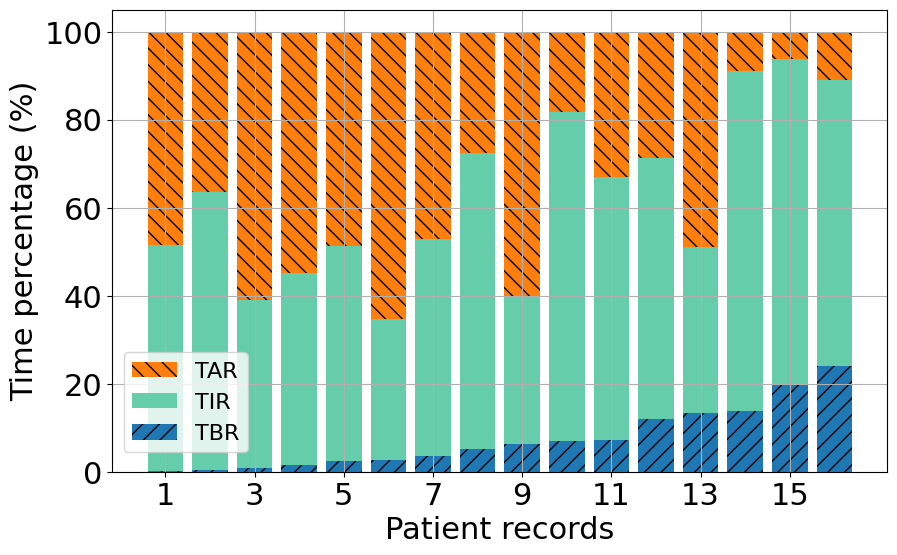

--- Shanghai_T2DM ---
TAR: 19.874316280471223 18.276609062190218
TIR: 77.77533632618926 17.955211631789965
TBR: 2.3503473933395105 7.145137010501268


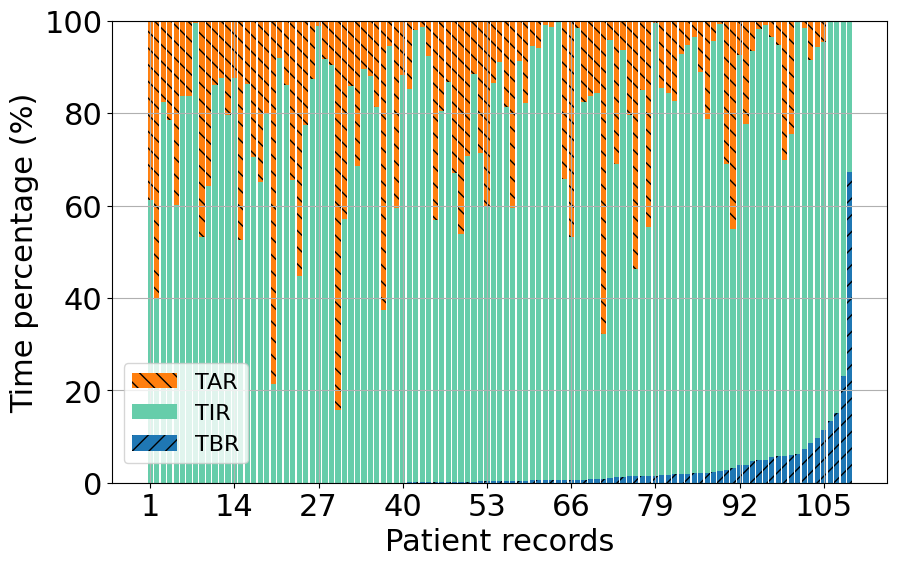

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists('bg_precentage'):
    os.mkdir('bg_precentage')
    
def bg_percentage(diabetes_type):
    data_path = f'data/new_data/{diabetes_type}'  # FIXED PATH
    low_res = []
    high_res = []
    lower_bound = 70
    higher_bound = 180
    fontsize = 22

    for file in os.listdir(data_path):
        file_path = f'{data_path}/{file}'
        data = pd.read_excel(file_path)

        # Try to find the CGM column dynamically
        possible_cols = [col for col in data.columns if 'CGM' in col or 'glucose' in col.lower()]
        if not possible_cols:
            print(f"Skipping {file} — no CGM column found.")
            continue

        data = data[possible_cols[0]].dropna()
        low_res.append(len(data[data < lower_bound]) / len(data) * 100)
        high_res.append(len(data[data > higher_bound]) / len(data) * 100)

    if not low_res:
        print(f"No valid data found in {diabetes_type}.")
        return

    index = sorted(enumerate(low_res), key=lambda x: x[1])
    index = [x[0] for x in index]
    low_res = np.array(low_res)[index]
    high_res = np.array(high_res)[index]
    normal_res = [100 - low_res[i] - high_res[i] for i in range(len(high_res))]
    high_bottom = [low_res[i] + normal_res[i] for i in range(len(high_res))]

    print(f"--- {diabetes_type} ---")
    print("TAR:", np.mean(high_res), np.std(high_res))
    print("TIR:", np.mean(normal_res), np.std(normal_res))
    print("TBR:", np.mean(low_res), np.std(low_res))

    x = np.arange(1, len(low_res) + 1)
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111)
    
    plt.bar(x, high_res, bottom=high_bottom, label='TAR', hatch='\\\\', color='#ff7f0e')
    plt.bar(x, normal_res, bottom=low_res, label='TIR', color='#66CDAA')
    plt.bar(x, low_res, label='TBR', hatch='//', color='#1f77b4')
    
    ax1.set_ylabel("Time percentage (%)", fontsize=fontsize)
    plt.xlabel('Patient records', fontsize=fontsize)
    my_x_ticks = np.arange(1, len(low_res) + 1, max(1, (len(low_res) + 1) // 8))
    plt.xticks(my_x_ticks)
    plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(0, 0.15))
    plt.tick_params(labelsize=fontsize)
    plt.grid()
    plt.savefig(f'bg_precentage/{diabetes_type}_sorted.png', dpi=200, bbox_inches='tight')
    plt.show()
    
bg_percentage('Shanghai_T1DM')
bg_percentage('Shanghai_T2DM')

In [11]:
# import numpy as np
# import joblib,os
# import matplotlib.pyplot as plt
# import pandas as pd
def plot_acf(data,time_interval=15,length=650,patient=''):
    y = data
    x = np.arange(length)
    yunbiased = y-np.mean(y)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    # # use only second half
    acor = acor[int(len(acor)/2):]
    acor=acor[x]

    x=[i/60*time_interval for i in x]
    # plt.xlim(-10,300)
    plt.plot(x,acor,label=patient)

def get_acf(data):
    y = data
#     x = np.arange(length)
    yunbiased = y-np.mean(y)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    # # use only second half
    acor = acor[int(len(acor)/2):]
    return acor

def get_acf(diabetes_type):
    path=f'{diabetes_type}'
    for patient in os.listdir(path):
        fig = plt.figure(figsize = (10,6),dpi=200)
        data_path=f'{path}/{patient}'
        data=pd.read_excel(data_path)
        data=data['CGM (mg / dl)'].dropna()
        print(patient)
        patient='_'.join(patient.split('_')[0:2])
        min_len=500
        if len(data)<2*min_len:
            plot_acf(data,time_interval=15,length=len(data)//2,patient=patient)    
        else:
            plot_acf(data,time_interval=15,length=min_len,patient=patient)    
        plt.xlabel('Time Lag (hour)', fontsize=18)
        plt.ylabel('Auto-correlation coefficient', fontsize=18)
        plt.tick_params(axis='both',labelsize =18)
        plt.title(f"{patient}",fontsize=18)
        plt.savefig(f"acf/{diabetes_type}/{patient}.jpg",dpi=200,bbox_inches='tight')
        plt.show()
        
if not os.path.exists('acf'):
    os.mkdir('acf')
    
# get_acf('Shanghai_T1DM')
# get_acf('Shanghai_T2DM')

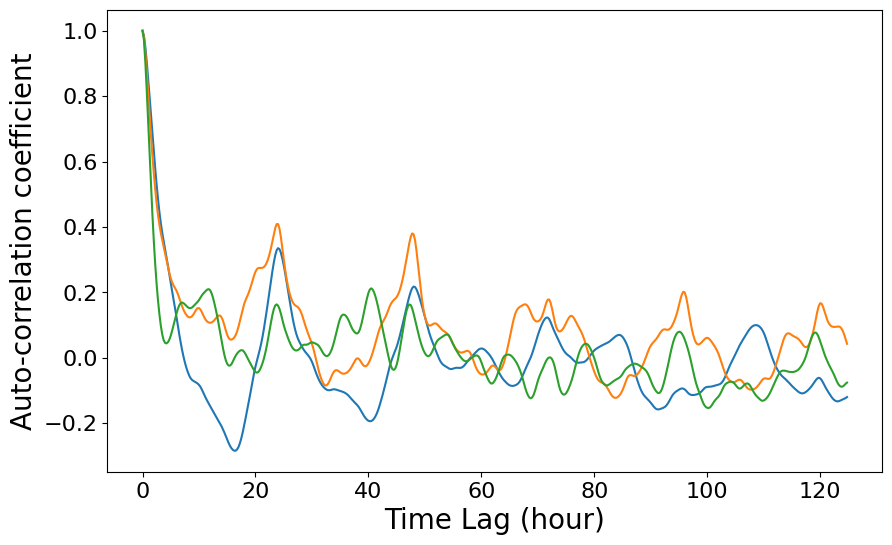

In [21]:
diabetes_type = 'Shanghai_T1DM'
data_path = f'data/new_data/{diabetes_type}'
min_len = 500
fig = plt.figure(figsize=(10, 6))

plot_acf(pd.read_excel(f'{data_path}/1005_0_20210522.xls')['CGM (mg / dl)'].dropna(), time_interval=15, length=min_len)
plot_acf(pd.read_excel(f'{data_path}/1003_0_20210831.xls')['CGM (mg / dl)'].dropna(), time_interval=15, length=min_len)
plot_acf(pd.read_excel(f'{data_path}/1007_0_20210726.xls')['CGM (mg / dl)'].dropna(), time_interval=15, length=min_len)

plt.xlabel('Time Lag (hour)', fontsize=20)
plt.ylabel('Auto-correlation coefficient', fontsize=20)
plt.tick_params(axis='both', labelsize=16)

# Save figure WITHOUT figsize argument
plt.savefig(f"acf/{diabetes_type}_acf.jpg", dpi=200, bbox_inches='tight')
plt.show()

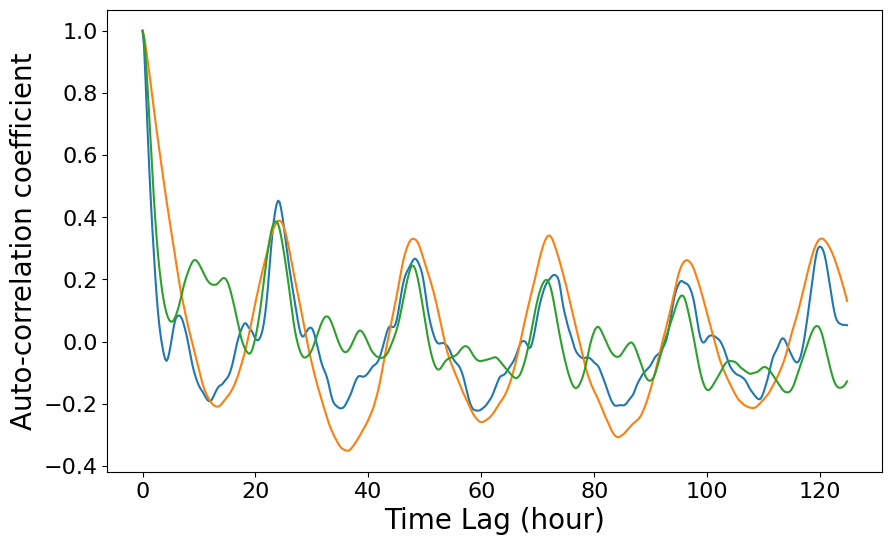

In [24]:
diabetes_type = 'Shanghai_T2DM'
data_path = f'data/new_data/{diabetes_type}'
min_len = 500
fig = plt.figure(figsize=(10, 6))


plot_acf(pd.read_excel(f'{data_path}/2016_0_20201224.xls')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plot_acf(pd.read_excel(f'{data_path}/2017_0_20210102.xlsx')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plot_acf(pd.read_excel(f'{data_path}/2018_0_20210420.xls')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plt.xlabel('Time Lag (hour)', fontsize=20)
plt.ylabel('Auto-correlation coefficient', fontsize=20)
plt.tick_params(axis='both', labelsize=16)

# Save figure WITHOUT figsize argument
plt.savefig(f"acf/{diabetes_type}_acf.jpg", dpi=200, bbox_inches='tight')
plt.show()

In [30]:
import matplotlib.dates as mdates

def plot_time_series(diabetes_type):
    data_path = f'data/new_data/{diabetes_type}'
    
    for file in os.listdir(data_path):
        data = pd.read_excel(f'{data_path}/{file}')
        if 'CGM (mg / dl)' not in data.columns:
            continue
        
        cgm = data['CGM (mg / dl)'].dropna()
        plt.figure(figsize=(12,4))
        plt.plot(cgm.values, label='CGM')
        plt.xlabel('Time (15-min intervals)')
        plt.ylabel('Glucose (mg/dl)')
        plt.title(f'Time series of CGM - {file}')
        plt.grid()
        plt.tight_layout()
        plt.show()

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(diabetes_type, lags=96):
    data_path = f'data/new_data/{diabetes_type}'
    
    for file in os.listdir(data_path):
        data = pd.read_excel(f'{data_path}/{file}')
        if 'CGM (mg / dl)' not in data.columns:
            continue
        
        cgm = data['CGM (mg / dl)'].dropna()
        
        plt.figure(figsize=(12,4))
        plot_acf(cgm, lags=lags, alpha=0.05)
        plt.title(f'ACF - {file}')
        plt.show()
        
        plt.figure(figsize=(12,4))
        plot_pacf(cgm, lags=lags, alpha=0.05)
        plt.title(f'PACF - {file}')
        plt.show()


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_cgm(diabetes_type):
    data_path = f'data/new_data/{diabetes_type}'
    patient_data = []

    for file in os.listdir(data_path):
        data = pd.read_excel(f'{data_path}/{file}')
        if 'CGM (mg / dl)' not in data.columns:
            continue
        cgm = data['CGM (mg / dl)'].dropna().values
        patient_data.append(cgm[:500])  # truncate or pad to same length
    
    X = np.array(patient_data)
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    
    plt.figure(figsize=(8,6))
    plt.scatter(components[:,0], components[:,1])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA of CGM data - {diabetes_type}')
    plt.grid()
    plt.show()


In [35]:
def decompose_cgm(diabetes_type, model_type='multiplicative'):
    data_path = f'data/new_data/{diabetes_type}'
    for file in os.listdir(data_path):
        data = pd.read_excel(f'{data_path}/{file}')
        if 'CGM (mg / dl)' not in data.columns:
            continue
        cgm = data['CGM (mg / dl)'].dropna()
        # 96 samples per day (15-min interval)
        result = seasonal_decompose(cgm, period=96, model=model_type, extrapolate_trend='freq')
        result.plot()
        plt.suptitle(f'Seasonal Decompose ({model_type}) - {file}')
        plt.show()


--- Processing Shanghai_T1DM ---


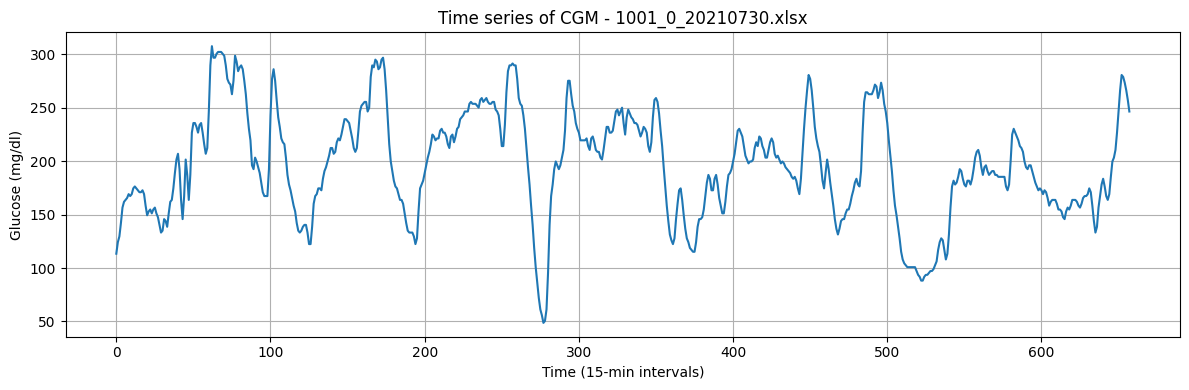

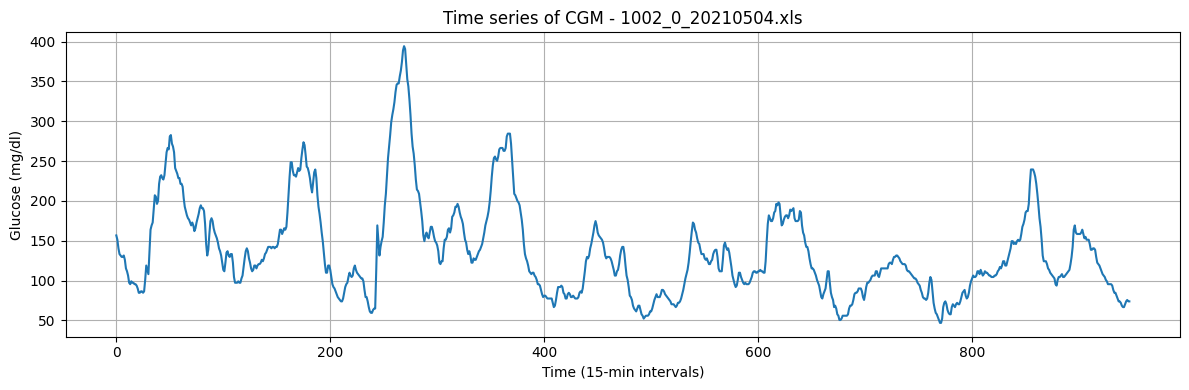

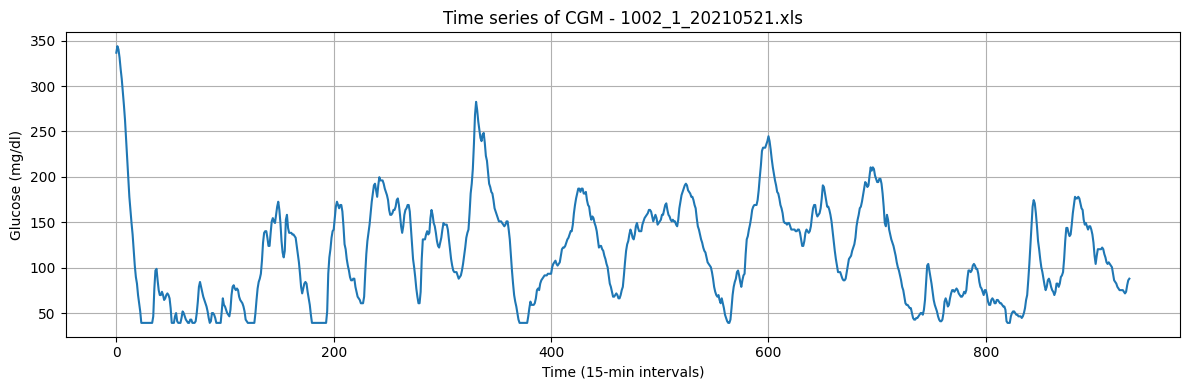

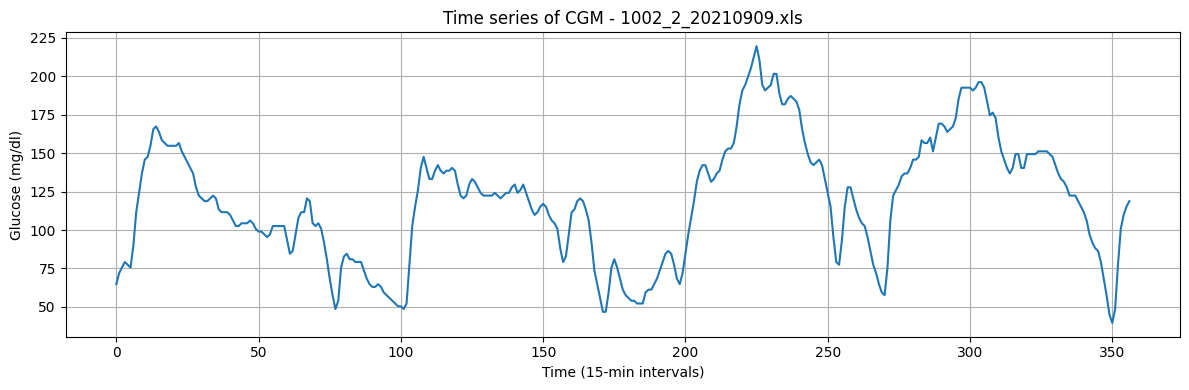

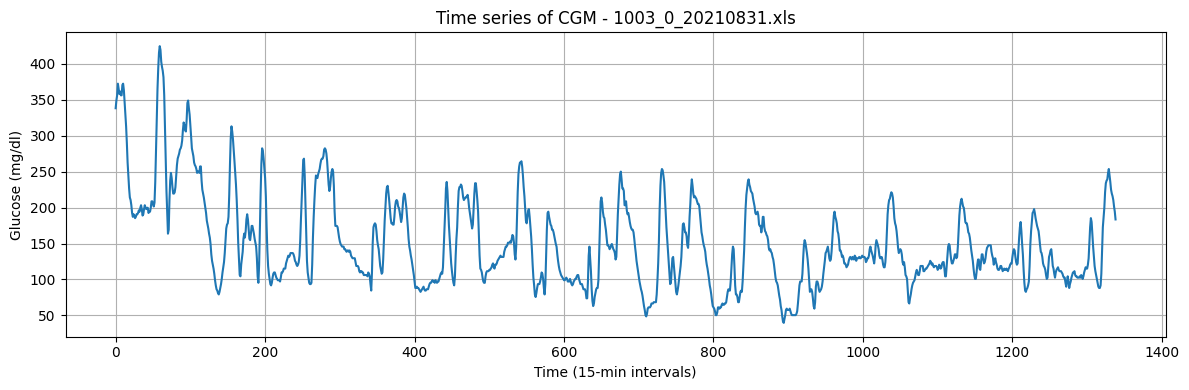

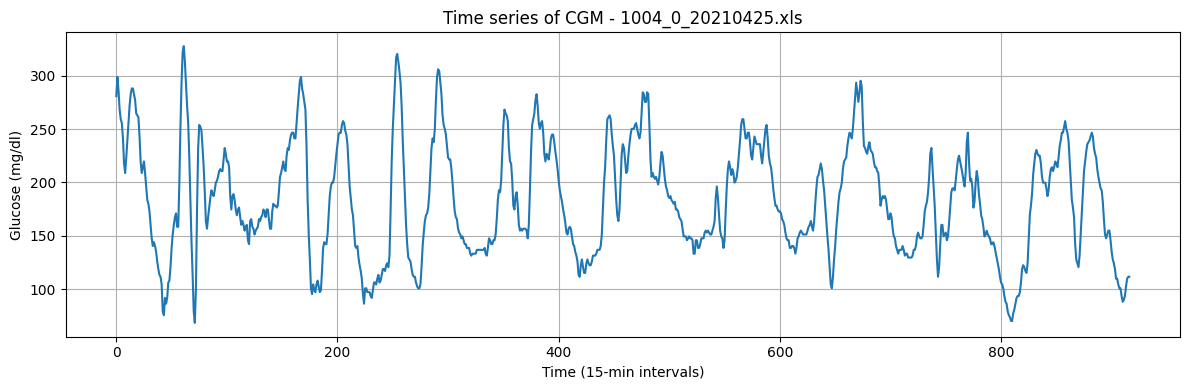

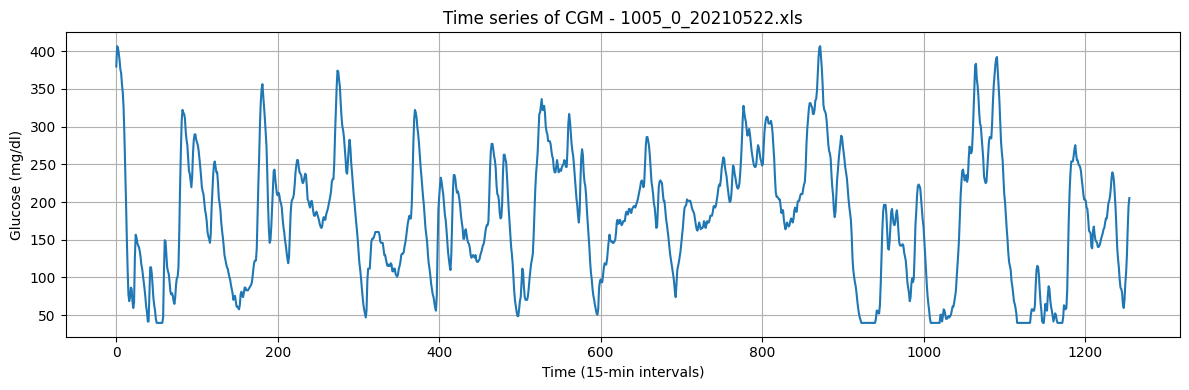

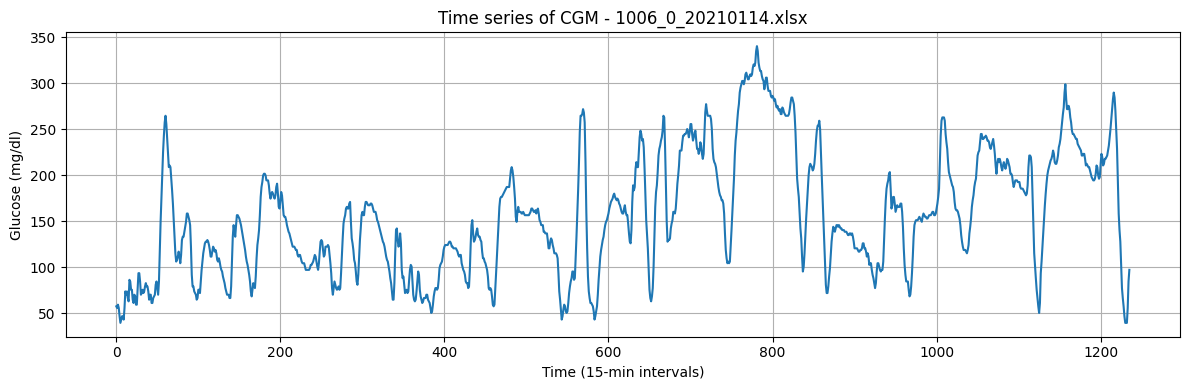

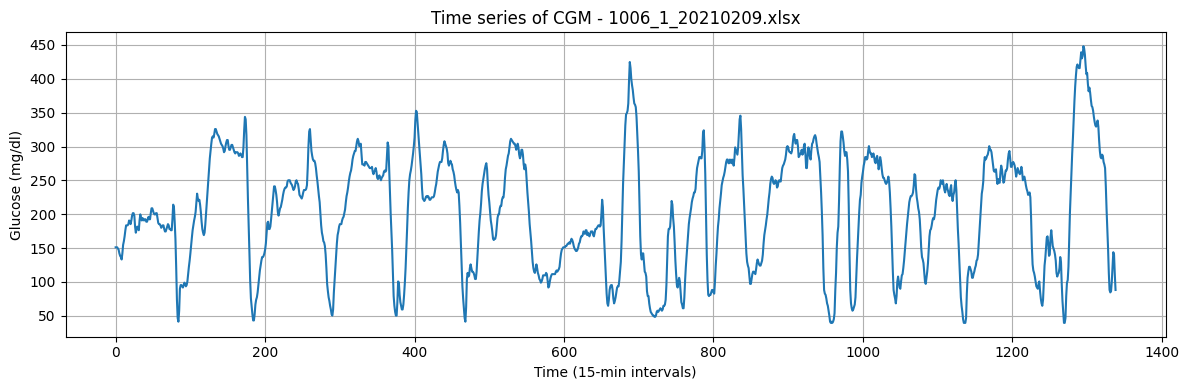

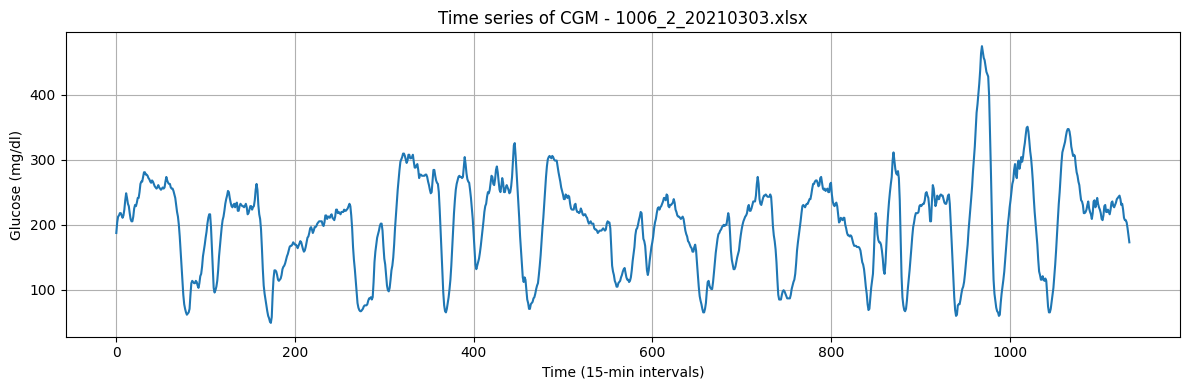

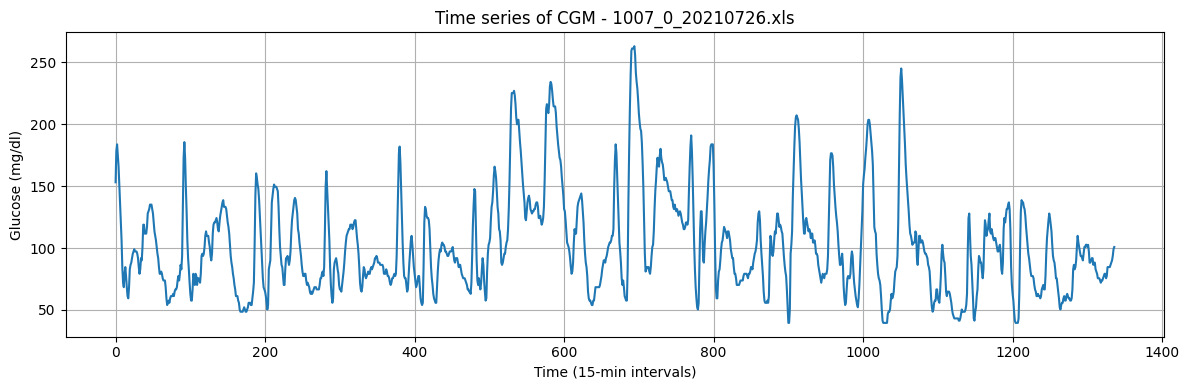

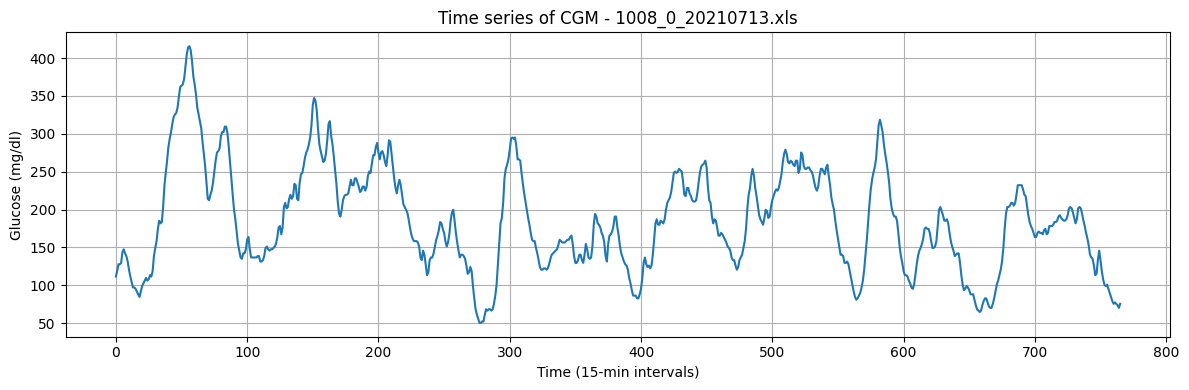

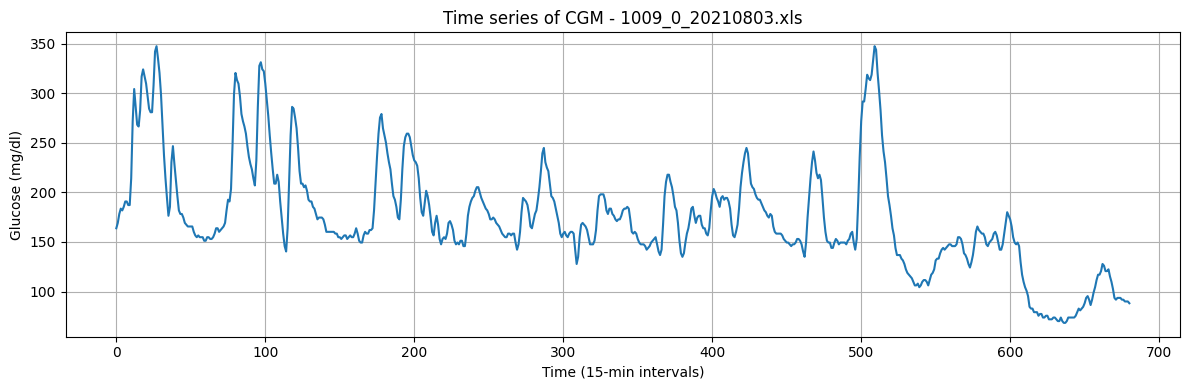

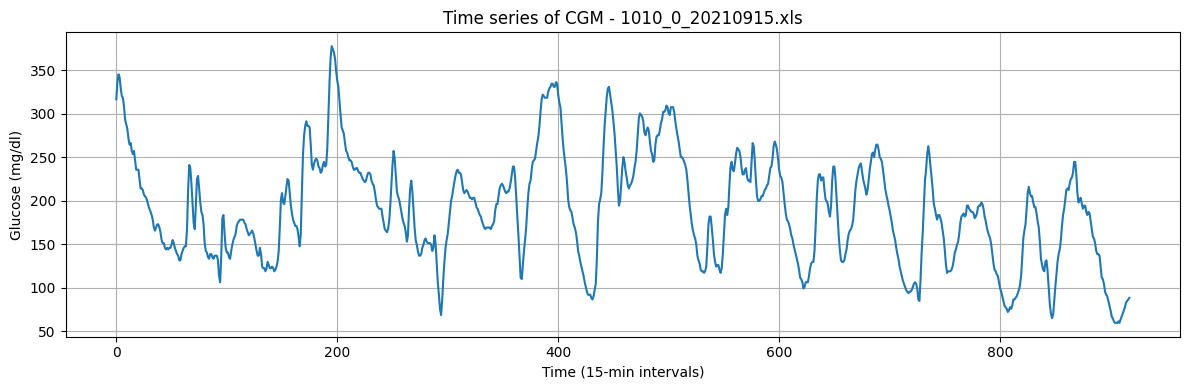

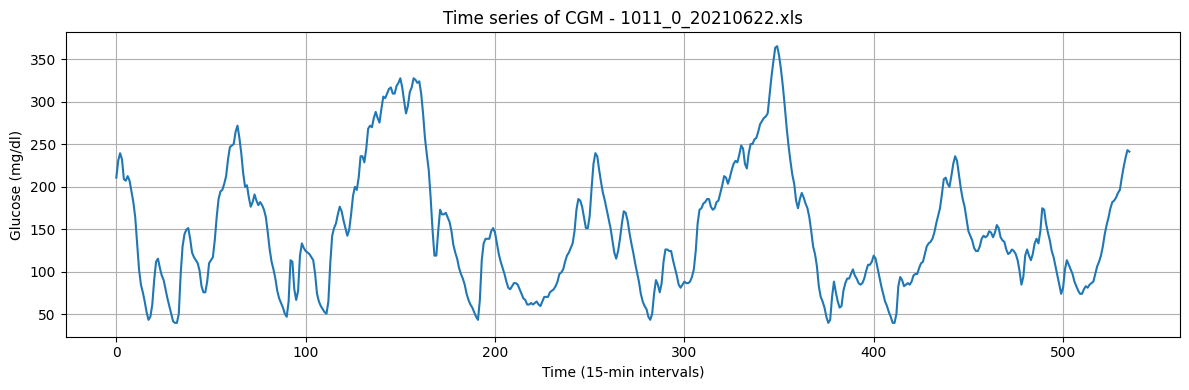

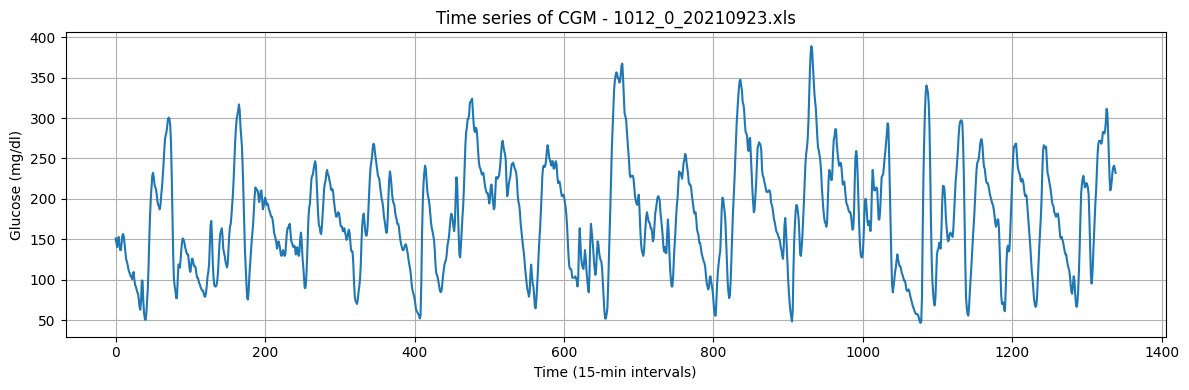

<Figure size 1200x400 with 0 Axes>

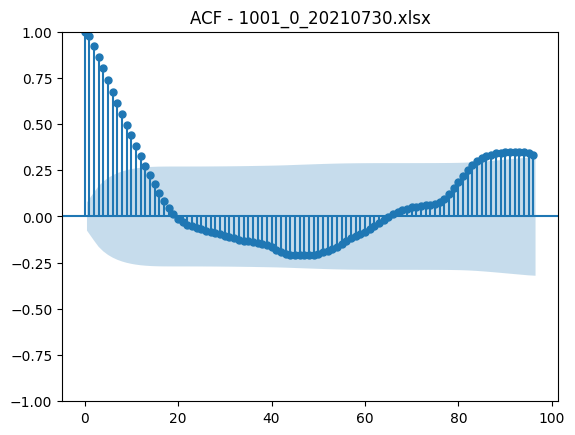

<Figure size 1200x400 with 0 Axes>

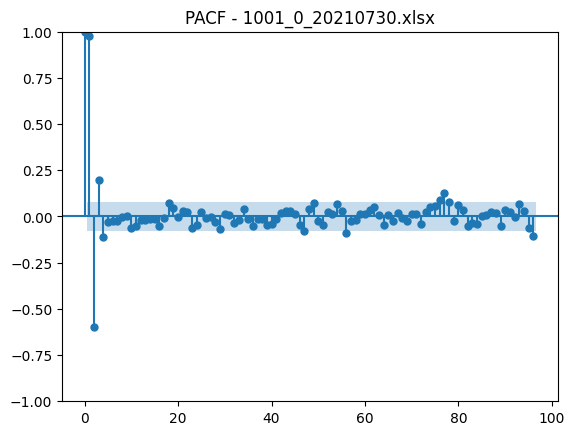

<Figure size 1200x400 with 0 Axes>

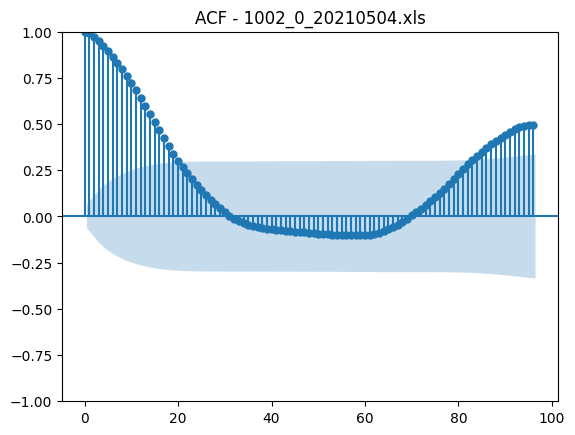

<Figure size 1200x400 with 0 Axes>

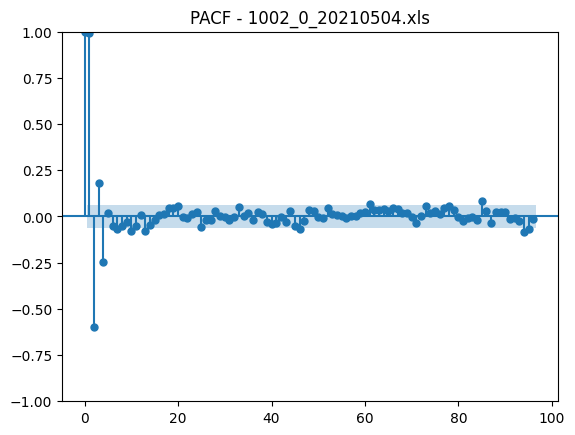

<Figure size 1200x400 with 0 Axes>

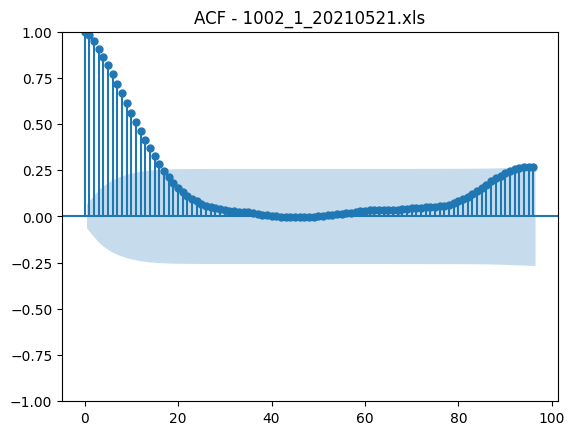

<Figure size 1200x400 with 0 Axes>

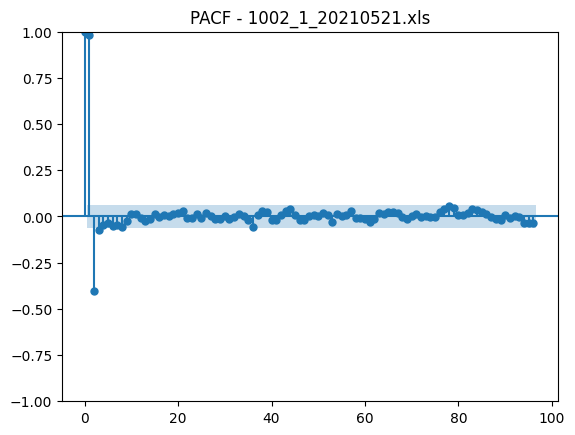

<Figure size 1200x400 with 0 Axes>

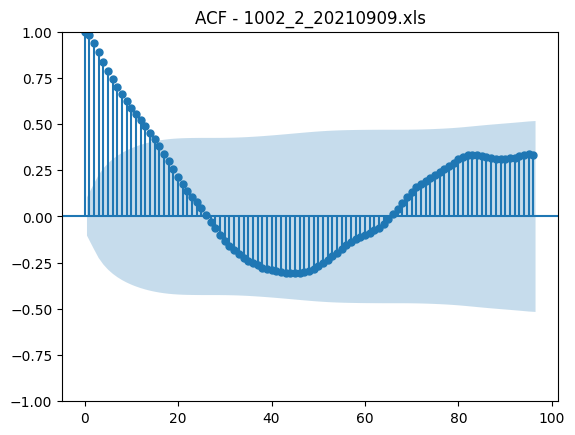

<Figure size 1200x400 with 0 Axes>

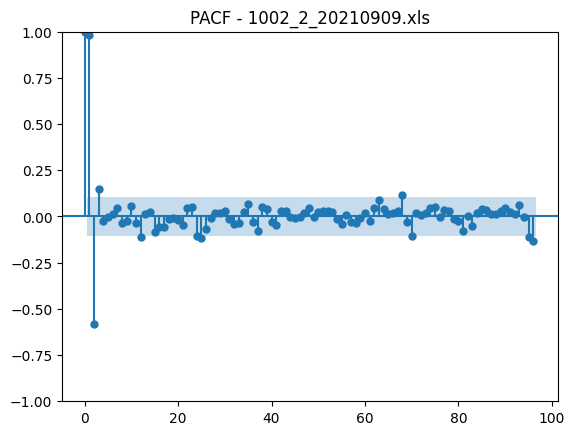

<Figure size 1200x400 with 0 Axes>

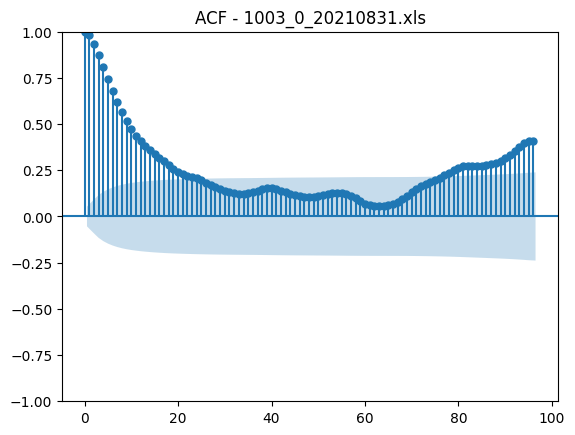

<Figure size 1200x400 with 0 Axes>

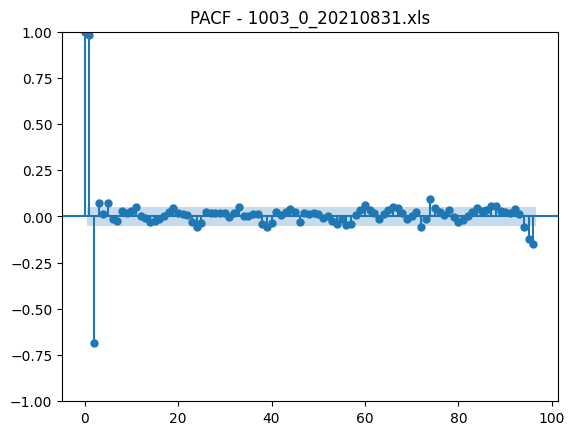

<Figure size 1200x400 with 0 Axes>

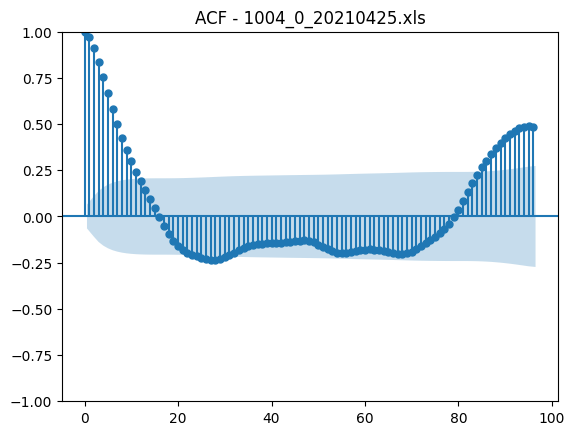

<Figure size 1200x400 with 0 Axes>

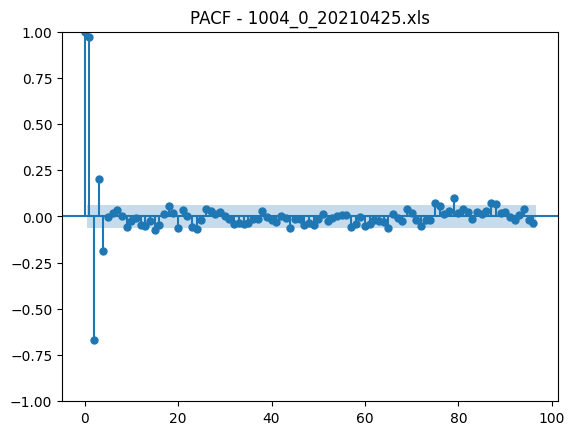

<Figure size 1200x400 with 0 Axes>

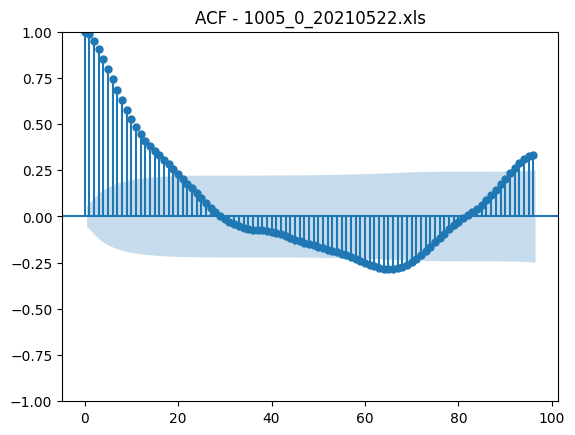

<Figure size 1200x400 with 0 Axes>

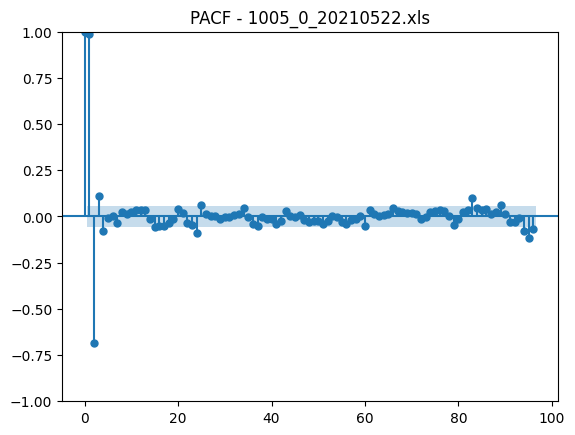

<Figure size 1200x400 with 0 Axes>

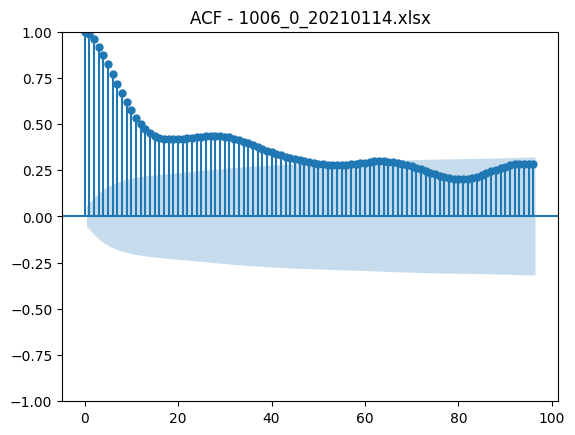

<Figure size 1200x400 with 0 Axes>

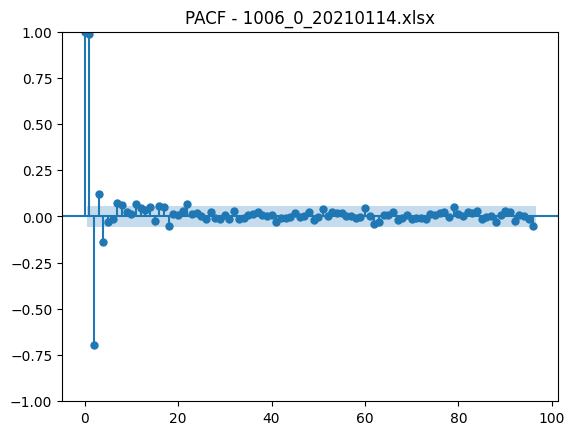

<Figure size 1200x400 with 0 Axes>

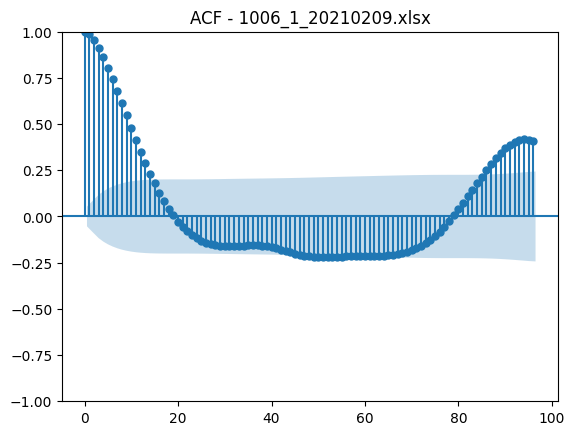

<Figure size 1200x400 with 0 Axes>

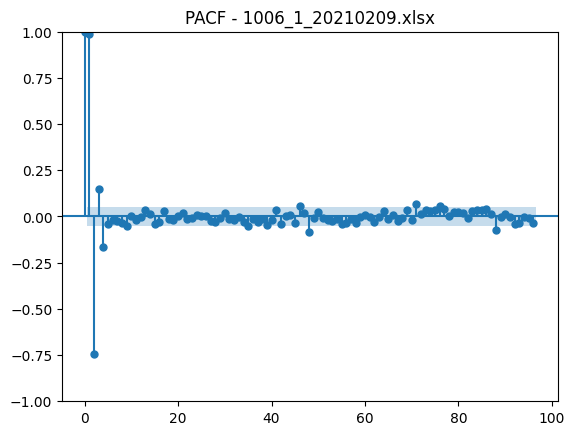

<Figure size 1200x400 with 0 Axes>

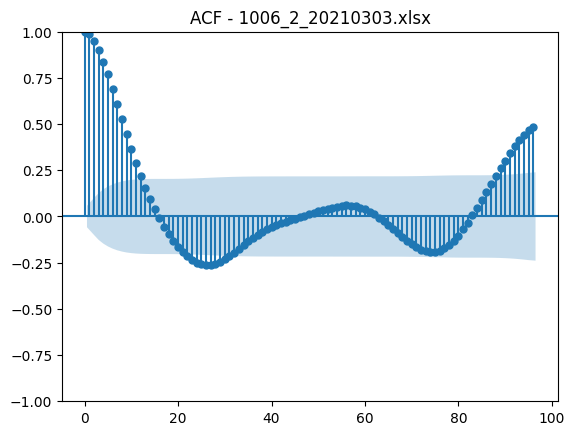

<Figure size 1200x400 with 0 Axes>

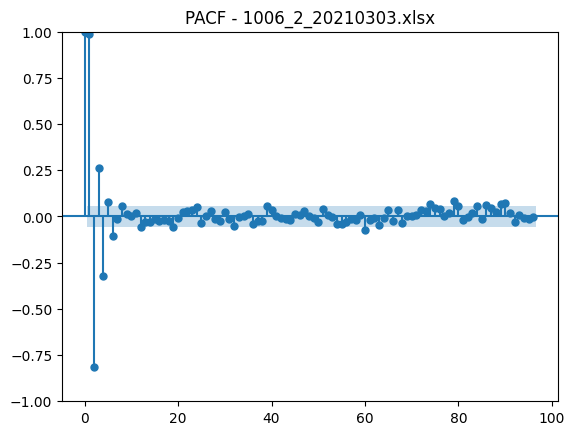

<Figure size 1200x400 with 0 Axes>

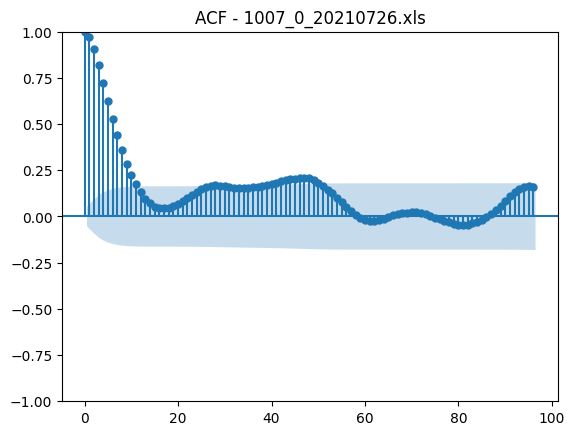

<Figure size 1200x400 with 0 Axes>

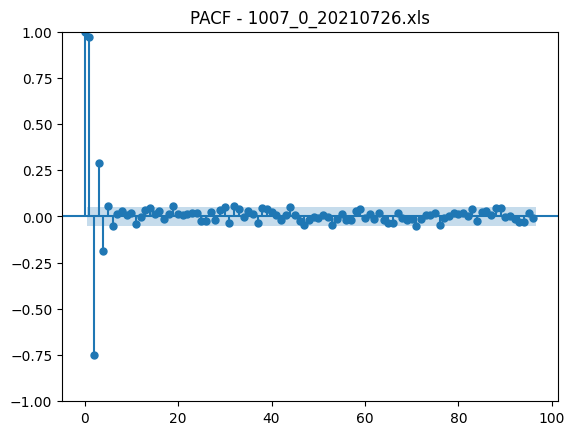

<Figure size 1200x400 with 0 Axes>

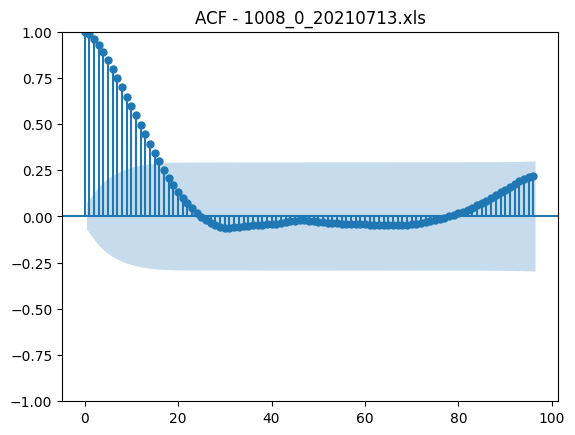

<Figure size 1200x400 with 0 Axes>

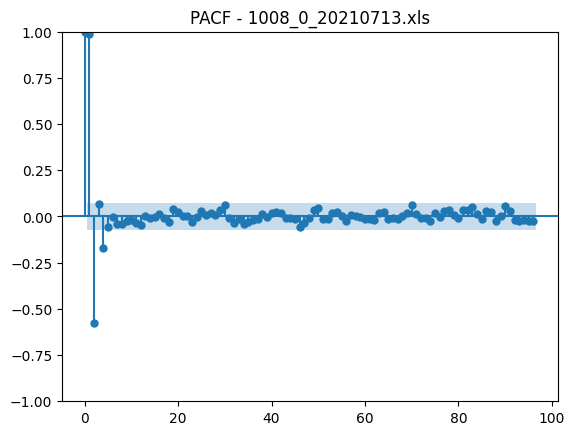

<Figure size 1200x400 with 0 Axes>

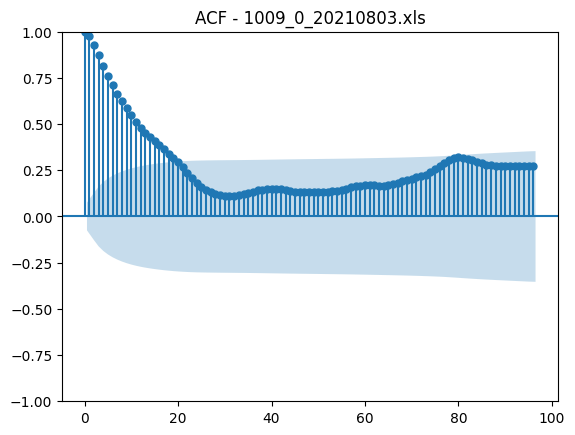

<Figure size 1200x400 with 0 Axes>

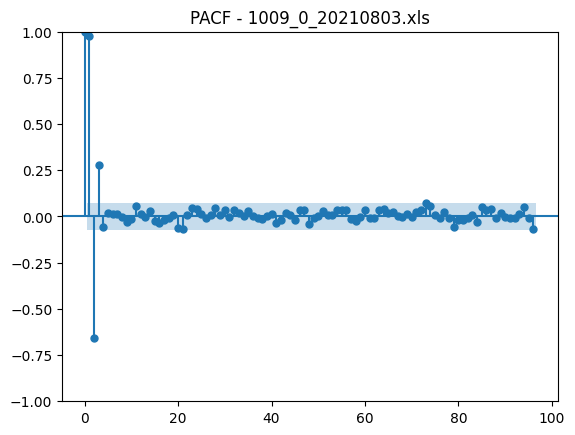

<Figure size 1200x400 with 0 Axes>

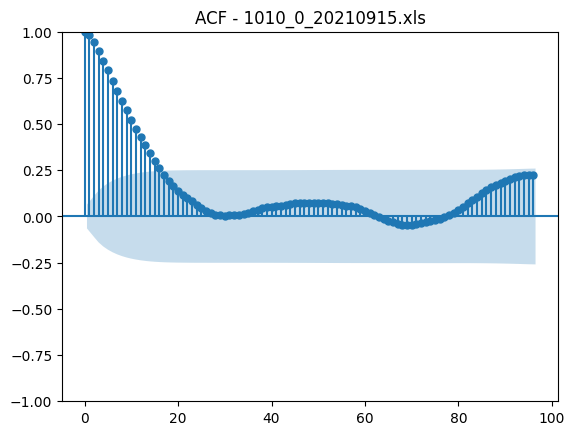

<Figure size 1200x400 with 0 Axes>

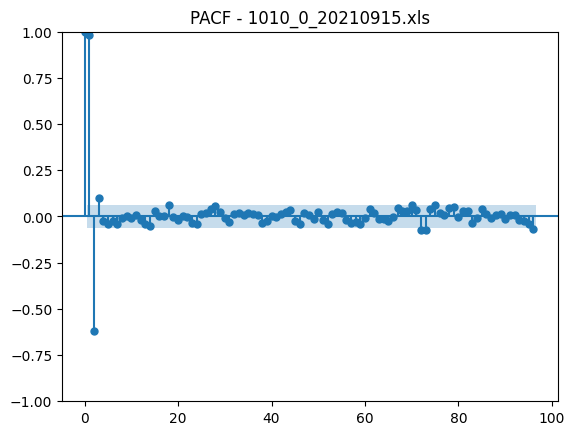

<Figure size 1200x400 with 0 Axes>

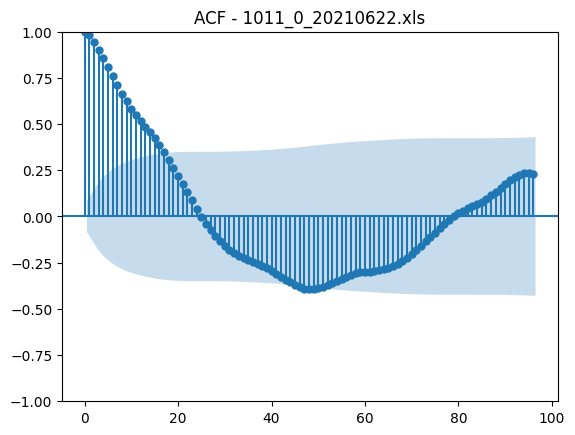

<Figure size 1200x400 with 0 Axes>

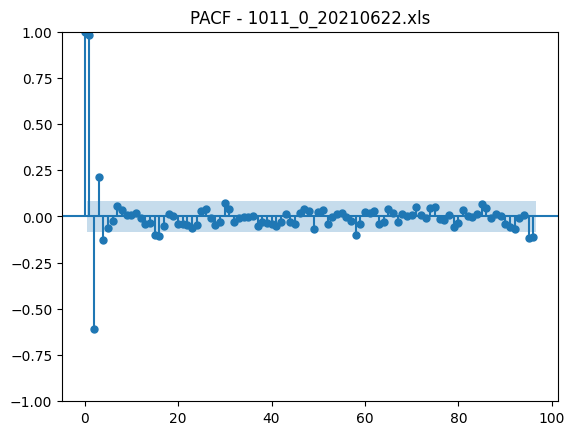

<Figure size 1200x400 with 0 Axes>

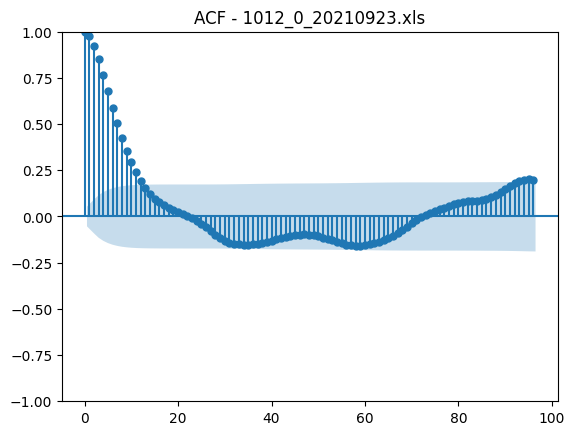

<Figure size 1200x400 with 0 Axes>

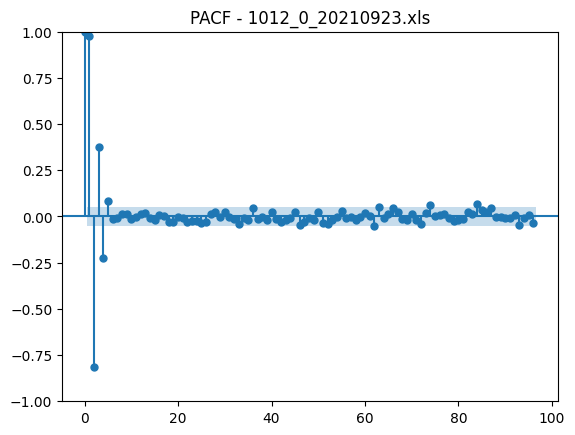

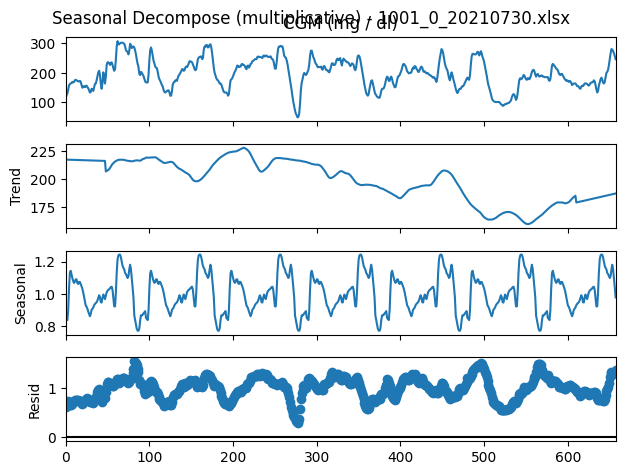

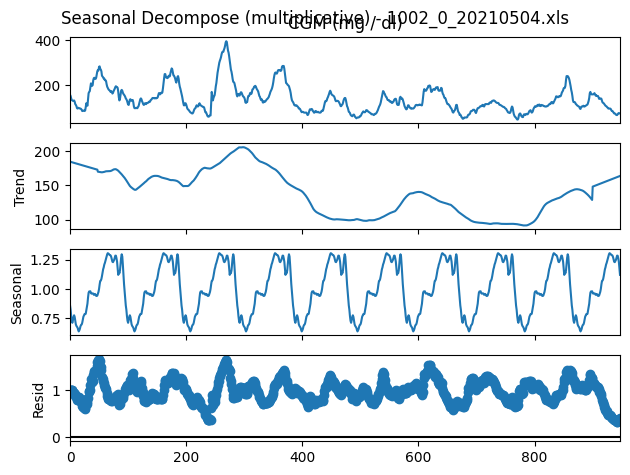

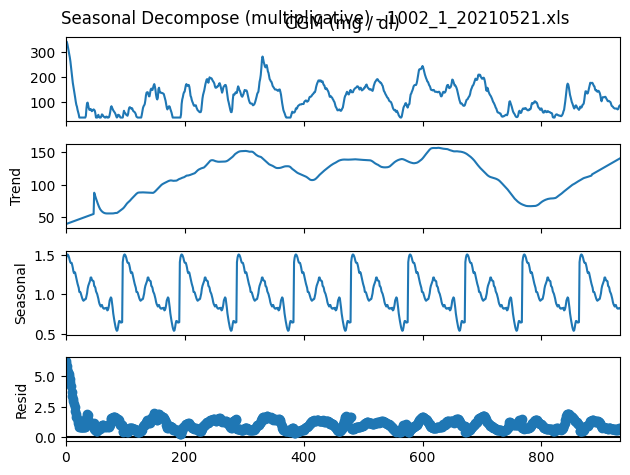

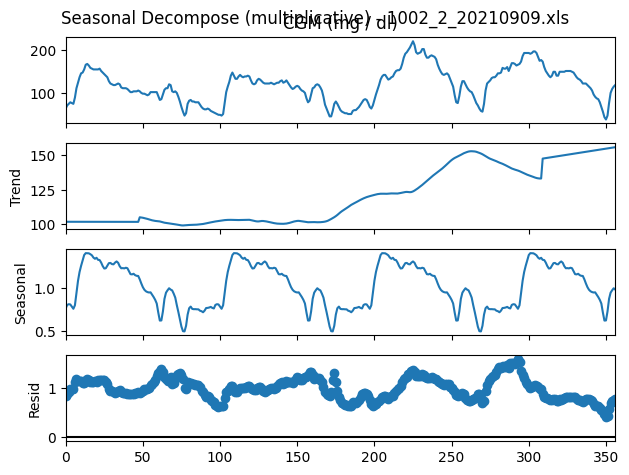

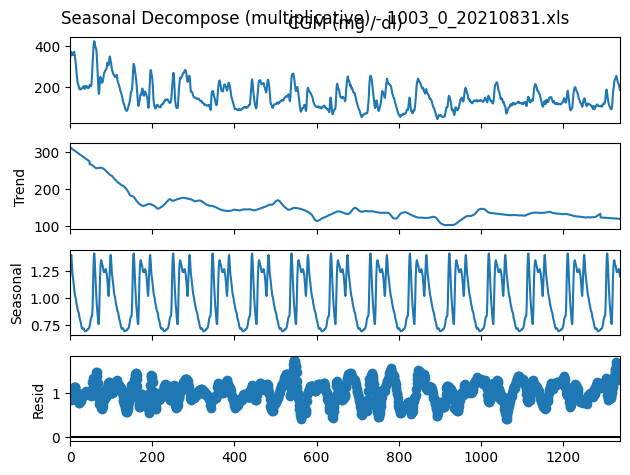

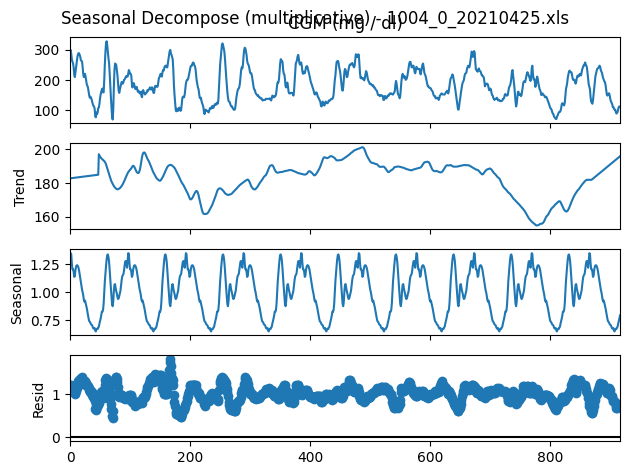

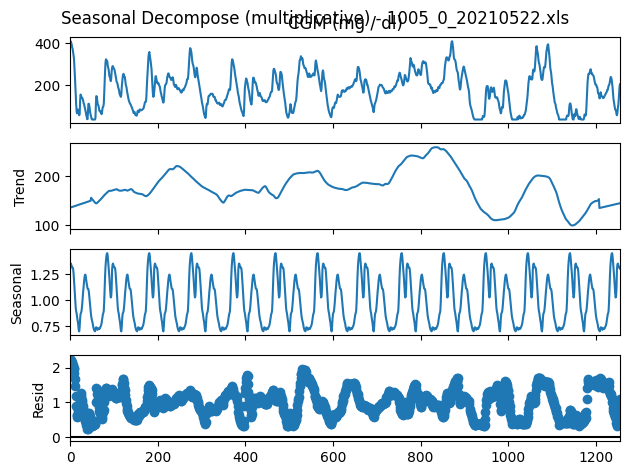

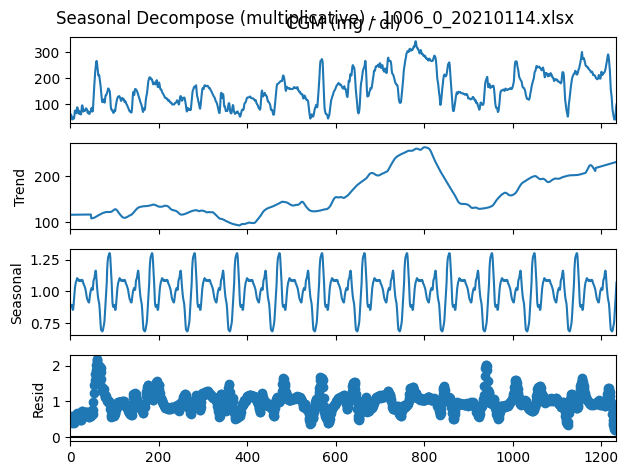

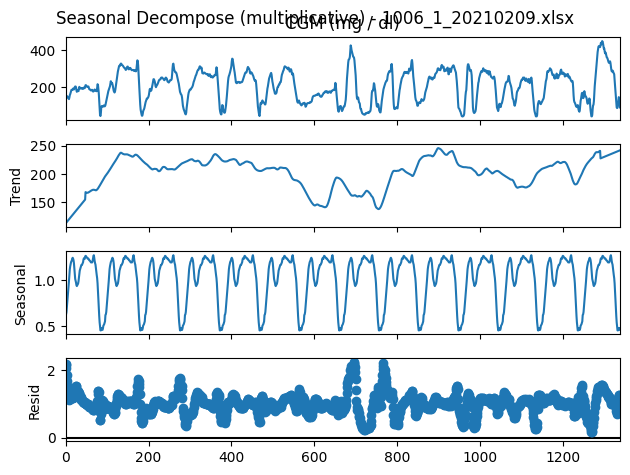

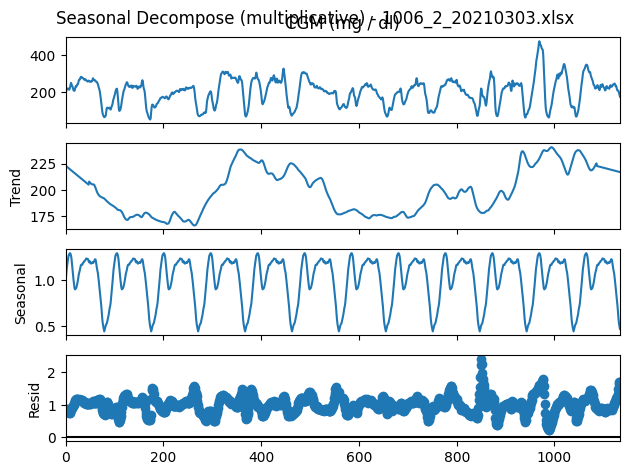

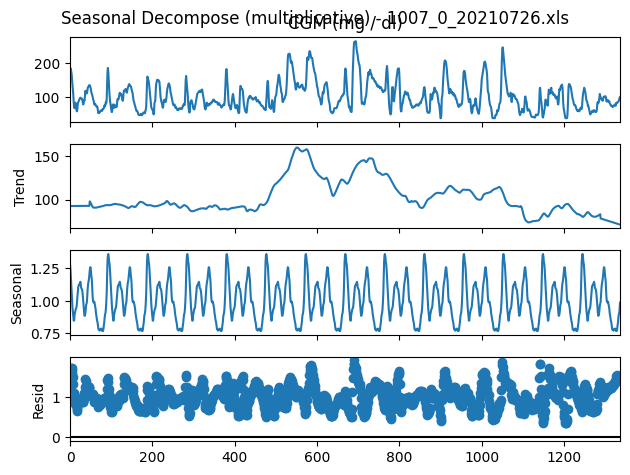

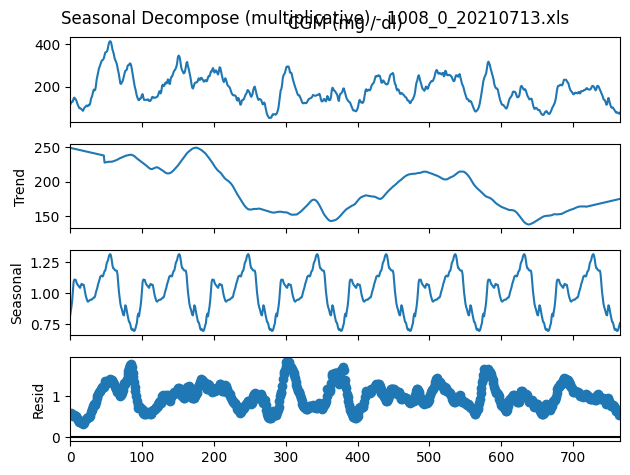

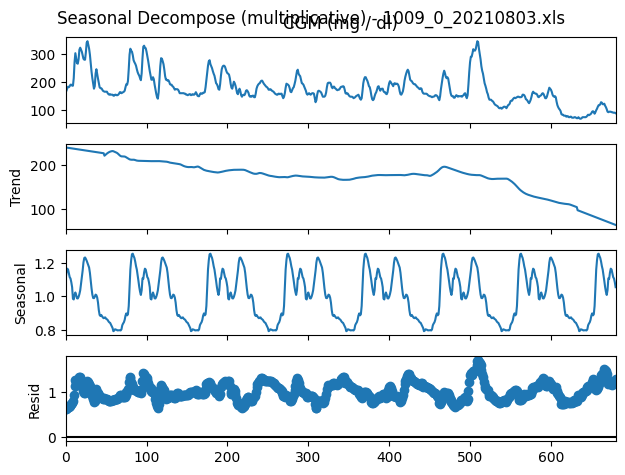

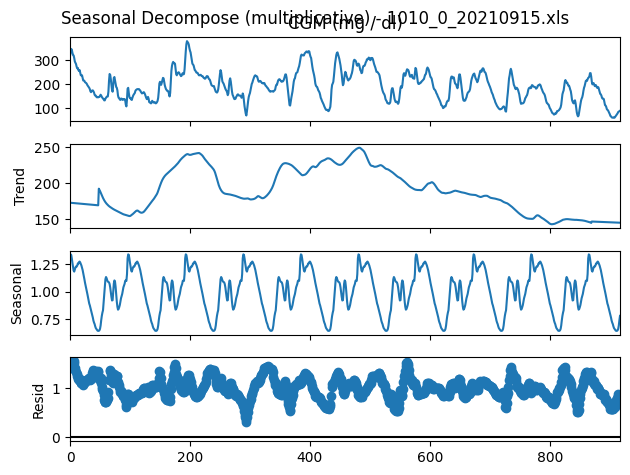

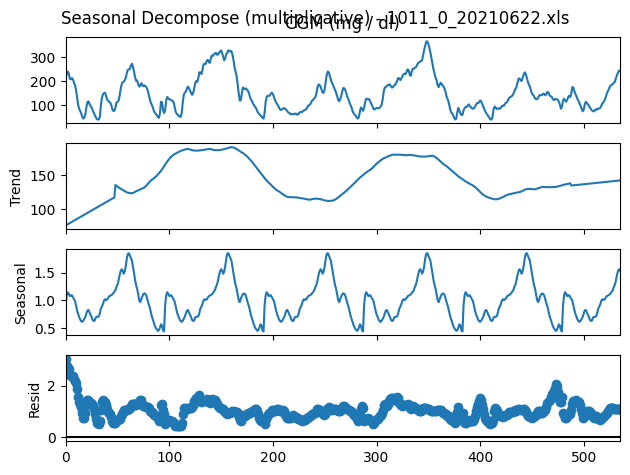

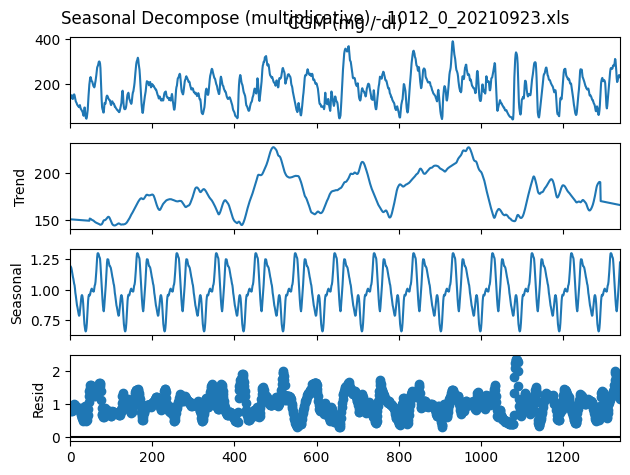

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

In [36]:
diabetes_type_list = ['Shanghai_T1DM', 'Shanghai_T2DM']

for diabetes_type in diabetes_type_list:
    print(f'--- Processing {diabetes_type} ---')
    plot_time_series(diabetes_type)
    plot_acf_pacf(diabetes_type)
    decompose_cgm(diabetes_type, model_type='multiplicative')
    pca_cgm(diabetes_type)

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def get_cgm_cbg(diabetes_type):
    data_path = f'data/new_data/{diabetes_type}'  # correct path to your data
    save_path = f'different_measure/{diabetes_type}'
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)  # create subfolder for this diabetes type
    
    for file in os.listdir(data_path):
        print(file)
        data = pd.read_excel(f'{data_path}/{file}')
        if 'CGM (mg / dl)' not in data.columns or 'CBG (mg / dl)' not in data.columns or 'Date' not in data.columns:
            print(f"Skipping {file} due to missing columns")
            continue
        data = data.dropna(subset=['CGM (mg / dl)'])
        data['time'] = pd.to_datetime(data['Date'], errors='coerce')
        new_data = data[data['CBG (mg / dl)'].notnull()].reset_index()
        if new_data.empty:
            continue
        new_data.index = new_data['time']
        
        plt.figure(figsize=(10,5), dpi=200)
        plt.plot(new_data['CGM (mg / dl)'], label='CGM', color='blue', marker='D', markersize=4)
        plt.plot(new_data['CBG (mg / dl)'], label='CBG', color='green', marker='o', markersize=4)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        plt.legend(fontsize=16)
        plt.xlabel('Date', fontsize=20)
        plt.ylabel('Blood glucose (mg/dl)', fontsize=20)
        plt.tick_params(axis='both', labelsize=16)
        plt.savefig(f'{save_path}/{file}.jpg', dpi=200, bbox_inches='tight')
        plt.close()

# Run for both datasets
get_cgm_cbg('Shanghai_T1DM')
get_cgm_cbg('Shanghai_T2DM')


1001_0_20210730.xlsx
1002_0_20210504.xls
1002_1_20210521.xls
1002_2_20210909.xls
1003_0_20210831.xls
1004_0_20210425.xls
1005_0_20210522.xls
1006_0_20210114.xlsx
1006_1_20210209.xlsx
1006_2_20210303.xlsx
1007_0_20210726.xls
1008_0_20210713.xls
1009_0_20210803.xls
1010_0_20210915.xls
1011_0_20210622.xls
1012_0_20210923.xls
2000_0_20201230.xlsx
2001_0_20201102.xlsx
2001_1_20201117.xlsx
2002_0_20210513.xlsx
2003_0_20210615.xlsx
2004_0_20211028.xlsx
2005_0_20211201.xlsx
2006_0_20211112.xlsx
2007_0_20220108.xlsx
2008_0_20220118.xlsx
2009_0_20211103.xlsx
2010_0_20220111.xlsx
2011_0_20220123.xlsx
2012_0_20220126.xlsx
2013_0_20220123.xlsx
2014_0_20201224.xlsx
2014_1_20210317.xlsx
2015_0_20210203.xlsx
2015_1_20210219.xlsx
2016_0_20201224.xls
2017_0_20210102.xlsx
2017_1_20201118.xls
2018_0_20210420.xls
2019_0_20210513.xls
2020_0_20210423.xls
2021_0_20211013.xls
2022_0_20210419.xls
2023_0_20210812.xls
2024_0_20210429.xls
2025_0_20210506.xls
2026_0_20210916.xls
2027_0_20210521.xls
2028_0_20210426.